# Hands-on 08: Ruído AWGN (caracterização e geração de amostras)

# Objetivos
As metas desse tutorial são ajudar o usuário a:
- Fazer uma breve revisão sobre ruído em comunicações analógicas e digitais (e métricas associadas);
- Entender o processe de geração de amostras de ruído branco (real e complexo);
- Praticar os conceitos com protótipos em Matlab e Python.

# Ruído AWGN

O ruído AWGN (_Additive White Gaussian Noise_) é um modelo muito utilizado para simular de efeito do ruído em muitos processos aleatórios que ocorrem na natureza. Por exemplo, o ruído intrínseco causado pela passagem dos elétrons na cadeia de transmissão e recepção digital é um exemplo de ruído que geralmente é modelado como sendo AWGN. Um ruído AWGN tem as seguintes características:

- **Gaussiano:** Esse ruído não tem uma fonte única, ele é resultado de várias distorções sofridas pelo sinal ao interagir com o meio de transmissão (circuitos, cabos, conectores, o ar), que ao somadas compõem, via teorema do limite central, uma variável aleatória com distribuição Gaussiana;

- **Aditivo:** É uma grandeza que se soma à amplitudade do sinal. 

Assim, em um modelo de sinal podemos escrever:
$$r(t) = s(t) + w(t),$$

sendo $r(t)$ o sinal recebido, $s(t)$ o sinal transmitido e $w(t)$ o ruído. A figura a seguir ilustra essa modelagem.
![fig_ruido](./FIGS/HD_08/figure-introduction-awgn-additive.png)
Contudo, algo muito importante: **o ruído $w(t)$ é estatisticamente independente do sinal $s(t)$**.

- **Branco:** Não concentra potência em uma frequência específica. Assim, possui potência uniforme em todo espectro (uma alusão à luz branca ser formada de todas as cores com mesma potência relativa). O termo branco refere-se à forma como a potência do sinal é distribuída (ou seja, independentemente) ao longo do tempo ou entre frequências. Assim, amostras de ruído AWGN são estatisticamente independentes. Mais formalmente, podemos definir:

> Um processo estocástico $v(t)$ é dito branco (ruído branco ou _white noise_) se os valores de $v(t_i)$ e $v(t_j)$ são descorrelacionados para todo $t_i$ e $t_j \neq t_i$ (autocovariância igual a zero). 

Veja o que já falamos sobre ruído branco no [Hands-on 04: Operações importantes com sinais](http://nbviewer.jupyter.org/github/vicentesousa/DCO2004/blob/master/h04_matlab.ipynb).

> Se $v(t_i)$ e $v(t_j)$ além de descorrelacionados são também independentes, então  $v(t)$ é denomidado **ruído estritamente branco**. 

Esse é o tipo de ruído que iremos praticar neste experimento.


Outra característica importante é que o ruído AWGN é completamente descrito por suas estatísticas de segunda ordem, as quais são relativamente fáceis de medir. Assim, você conseguirá saber tudo que precisa sobre o ruído AWGN ao conhecer sua média (estatística de primeira ordem, que é igual a zero) e sua variância (estatística de segunda ordem). Como mostrado no [Hands-on 04: Operações importantes com sinais](http://nbviewer.jupyter.org/github/vicentesousa/DCO2004/blob/master/h04_matlab.ipynb),

$$P = E[x^2] = {\mu_x}^2 + {\sigma_x}^2.$$ 

Assim, como a média do ruído AWGN é zero, a sua potência $P = {\sigma_x}^2$.

Nyquist investigou as propriedades do ruído térmico (ruído gerado pela agitação térmica de cargas no interior de um condutor eléctrico em equilíbrio) e mostrou que sua densidade espectral de potência é igual a $k \cdot T$, com $k$ sendo a constante de Boltzmann e $T$ é temperatura em Kelvin. Como consequência, a potência do ruído é diretamente proporcional à temperatura equivalente e, por isso, chamado de ruído térmico. Historicamente, esse valor constante (indicado como uma densidade espectral de ruído) é escrito como $\frac{N_{0}}{2}$ Watts/Hz.

Assim, para um sinal amostrado na taxa de Nyquist ($2B$), o ruído tem potência igual à $P = N_{0} \cdot B$.

# Prática 01: Ruído em comunicações analógicas

Geralmente, analisar somente a potência (ou energia) do sinal recebido não é suficiente para caracterizar um enlace de comunicações como bom ou ruim. Além da potência (ou energia) recebida, deve-se medir a potência do agente causador da distorção (ou erro) na comunicação. Para um sistema de comunicação livre de interferência externa (e.g. sem interferência co-canal), o ruído pode ser a fonte dominante da causa de distorção (erros) na comunicação. Neste caso, a $SNR$ ou a $E_b/N_0$ são métricas bem apropriadas para classificar um enlace de comunicação como bom ou ruim. A SNR é mais apropriada para comunicações analógicas, pois é uma métrica associada a um sinal potência. Já a $E_b/N_0$ é mais apropriada para sistemas digitais, pois, a cada tempo de símbolo, o receptor tem um sinal limitado no tempo (sinal energia) para decidir qual bit foi enviado pelo transmissor. Como a potência média de um sinal energia é zero, só nos resta medir a energia do sinal que representa o bit em sistemas digitais.

Dessa forma, a caracterização de um enlace de comunicação está sempre atrelada ao valor da $SNR$ do sinal no receptor. Esse experimento se destina a praticar a geração de amostras de ruído dado uma $SNR$ de entrada. 



**Passo 01:** Abra um script no Python, salve-o como **handson8_1.py** e escreva o seguinte código (se for executar o código, não esqueça de mudar o Kernel do Jupyter para Python):

Estimação de SNR: 
   SNR de entrada: 10 dB
   SNR de entrada: 10.035479591131143 dB


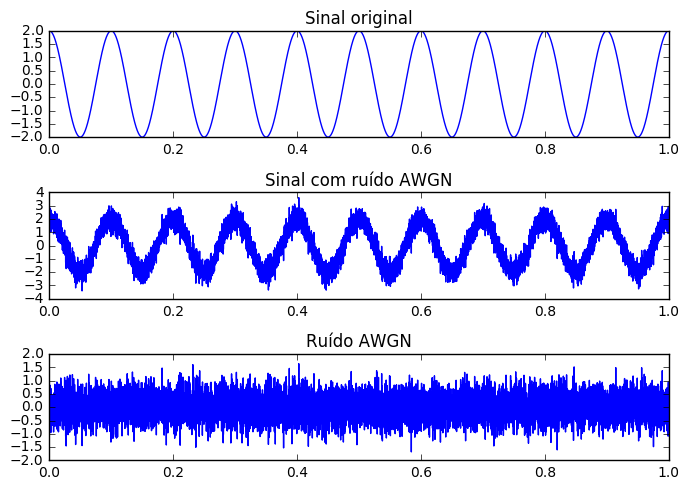

In [13]:
# AWGN_Real.m
## Parâmetros
import numpy as np
import matplotlib.pyplot as plt
#
SNR_dB = 10                                    # Determina o valor da SNR em dB
t = np.arange(0,5,0.0001)                      # Eixo do tempo
A = 2                                          # Amplitude do sinal de entrada x(t)
x=A*np.cos(2*np.pi*10*t)                       # Sinal qualquer x(t)
#
## Montagem do vetor ruído 
N = len(x)                                     # Calcula o comprimento de x
Ps = np.sum(np.abs(x)**2)/N                    # Calcula a potência do sinal
SNR = 10**(SNR_dB/10)                          # Calcula a SNR linear
Pn = Ps/SNR                                    # Calcula a potência do ruído
noiseSigma = np.sqrt(Pn)                       # Desvio padrão  para ruído AWGN (amostras reais)
# Geração manual das amostras de ruído 
media = 0.0
desvio_padrao=1.0
n = np.random.normal(media,noiseSigma,N)       # Amostras de ruído 
y = x + n                                      # Sinal Ruidoso
#
# Estimação da SNR pelas amostras do sinal recebido
pTx = (np.linalg.norm(x)**2)/N                 # Potência do sinal x(t)
pNe = (np.linalg.norm(n)**2)/N                 # Potência estimada do ruído
SNR1 = pTx/pNe;                                # Estimação da SNR linear
SNR1= 10*np.log10(SNR1)                        # SNR em dB
#
# Mostrar informações
print('Estimação de SNR: ')
print('   SNR de entrada: {} dB'.format(SNR_dB))
print('   SNR de entrada: {} dB'.format(SNR1))

## Gráficos
plt.figure(1,[7,5])
#
plt.subplot(311)
plt.title("Sinal original")
plt.plot(t,x)
plt.xlim([0,1]) 
#
plt.subplot(312)
plt.title("Sinal com ruído AWGN")
plt.plot(t,y)
plt.xlim([0,1]) 
#
plt.subplot(313)
plt.title("Ruído AWGN")
plt.plot(t,n)
plt.xlim([0,1]) 
#
plt.tight_layout()
plt.show()

**Passo 02:** Abra um script no Matlab, salve-o como **handson8_1.m** e escreva o seguinte código:

Estimação de SNR: 
   SNR de entrada: 10 dB
   SNR de entrada: 9.9789 dB
   SNR de entrada: 9.9908 dB


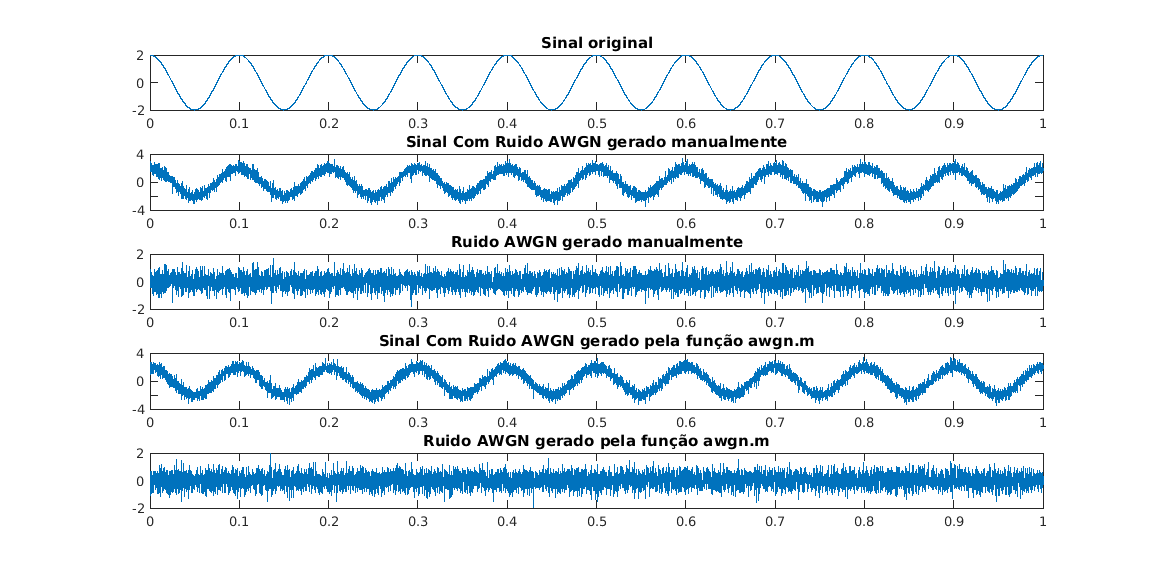

In [3]:
%% AWGN real
clc;clear all;close all;
% Parâmetros
SNR_dB = 10;                              % Determina o valor da SNR em dB
t = 0:0.0001:5;                           % Eixo do tempo
A = 2;                                    % Amplitude do sinal de entrada x(t)
x=A*cos(2*pi*10*t);                       % Sinal qualquer x(t)
%
% Geração manual das amostras de ruído 
N = length(x);                            % Calcula o comprimento de x
Ps = sum(abs(x).^2)/N;                    % Calcula a potência do sinal
SNR = 10^(SNR_dB/10);                     % Calcula a SNR linear
Pn = Ps/SNR;                              % Calcula a potência do ruído
noiseSigma = sqrt(Pn);                    % Desvio padrão do ruído AWGN (amostras reais)
n = noiseSigma* randn(1,N);               % Vetor do ruído 
y = x + n;                                % Sinal ruidoso na recepção
%
% Estimação da SNR pelas amostras do sinal recebido
pTx = sum(abs(x.^2))/N;                   % Potência do sinal x(t)
pNe = sum(abs(n.^2))/N;                   % Potência estimada do ruído
SNR1 = pTx/pNe;                           % Estimação da SNR linear
SNR1= 10*log10(SNR1);                     % SNR em dB
%
% Gerar ruído com a função awgn.m
y2 =  awgn(x,SNR_dB,'measured');
%
% Estimação da SNR pelas amostras do sinal geradas pela função awgn.m
n2 = y2-x;
potN2 = sum(abs(n2.^2))/N;                % Potência estimada do ruído
SNR2 = pTx/potN2;                         % Estimação da SNR linear
SNR2 = 10*log10(SNR1);                    % SNR em dB
%
% Mostrar informações
disp('Estimação de SNR: ')
disp(['   SNR de entrada: ' num2str(SNR_dB) ' dB']);
disp(['   SNR de entrada: ' num2str(SNR1) ' dB']);
disp(['   SNR de entrada: ' num2str(SNR2) ' dB']);
%
% Gráficos
fig=figure;
subplot(5,1,1);
plot(t,x);
title('Sinal original')
axis([0 1 -2 2]);
%
subplot(5,1,2);
plot(t,y);
title('Sinal Com Ruido AWGN gerado manualmente');
axis([0 1 -4 4]);
%
subplot(5,1,3);
plot(t,n);
title('Ruido AWGN gerado manualmente');
axis([0 1 -2 2]);
%
subplot(5,1,4);
plot(t,y2);
title('Sinal Com Ruido AWGN gerado pela função awgn.m');
axis([0 1 -4 4]);
%
subplot(5,1,5);
plot(t,n2);
title('Ruido AWGN gerado pela função awgn.m');
axis([0 1 -2 2]);
fig.PaperUnits = 'inches';
fig.PaperPosition = [0 0 12 6];

### Comentários sobre o código

- Supondo que o sinal transmitido seja $s(t)$, estimamos sua potência média como:
$$ P_{s} = \frac {1} {N} \sum_{1}^{N} \left | s(i)  \right |^2 $$
sendo $N$ = length($s$), o comprimento do vetor de amostras de $s(t)$.

- Dada uma SNR de entrada em dB, a convertemos para escala linear e calculamos a potência do ruído (sua variância) como
$$SNR = \frac{P_s}{P_n} \rightarrow Pn = \frac{P_s}{SNR} \rightarrow \sigma = \sqrt{P_n}.$$

- De posse do desvio padrão do ruído, geramos o sinal recebido manualmente (vetor $y$) e usando a função **awgn.m** do Matlab (vetor $y2$):
>```python
n = noiseSigma* randn(1,N);               % Vetor do ruído gerado manualmente
y = x + n;                                % Sinal ruidoso na recepção
y2 =  awgn(y,10,'measured');              % Gerar ruído com a função awgn.m
```

- Estimamos o valor da SNR por meio das amostras do vetor $y$ e do vetor $y2$. Os resultados estimados foram compatíveis com a SNR de entrada.
>```python
% Estimação da SNR pelas amostras do sinal recebido
pTx = sum(abs(x.^2))/N;                   % Potência do sinal x(t)
pNe = sum(abs(n.^2))/N;                   % Potência estimada do ruído
SNR1 = pTx/pNe;                           % Estimação da SNR linear
SNR1= 10*log10(SNR1);                     % SNR em dB
% Estimação da SNR pelas amostras do sinal geradas pela função awgn.m
n2 = y2-x;
potN2 = sum(abs(n2.^2))/N;                % Potência estimada do ruído
SNR2 = pTx/potN2;                         % Estimação da SNR linear
SNR2 = 10*log10(SNR1);                    % SNR em dB
```

Em algumas aplicações, o sinal não é real, mas complexo, principalmente quando a informação de fase for importante ser modelada. Neste caso, o ruído também deve ser complexo e devemos ter cuidado para que as duas amostras geradas (parte real e imaginária) continuem gerando um sinal com o desvio espeficado. Para isso, considerando o ruído Gaussiano, precisamos fazer a seguinte normalização:

$$s_{\sigma} = s_{\frac{\sigma}{\sqrt{2}}} + j\cdot s_{\frac{\sigma}{\sqrt{2}}}$$

Para testar esse resultado, fazemos:

In [3]:
N = 1e7;
sigma = 3; 
s1 = sigma/sqrt(2)*randn(1,N);
s2 = sigma/sqrt(2)*randn(1,N);
s = s1+j*s2;
disp(['Desvio padrão especificado: ' num2str(sigma)]);
disp(['Desvio padrão calculado das amostras: ' num2str(std(s))]);

Desvio padrão especificado: 3
Desvio padrão calculado das amostras: 3.0007


**Passo 03:** Vamos repetir o experimento do passo anterior, mas agora para sinais complexos. Abra um script no Python, salve-o como **handson8_2.py** e escreva o seguinte código:

Estimação de SNR: 
   SNR de entrada: 5 dB
   SNR de entrada: 5.073145843565429 dB


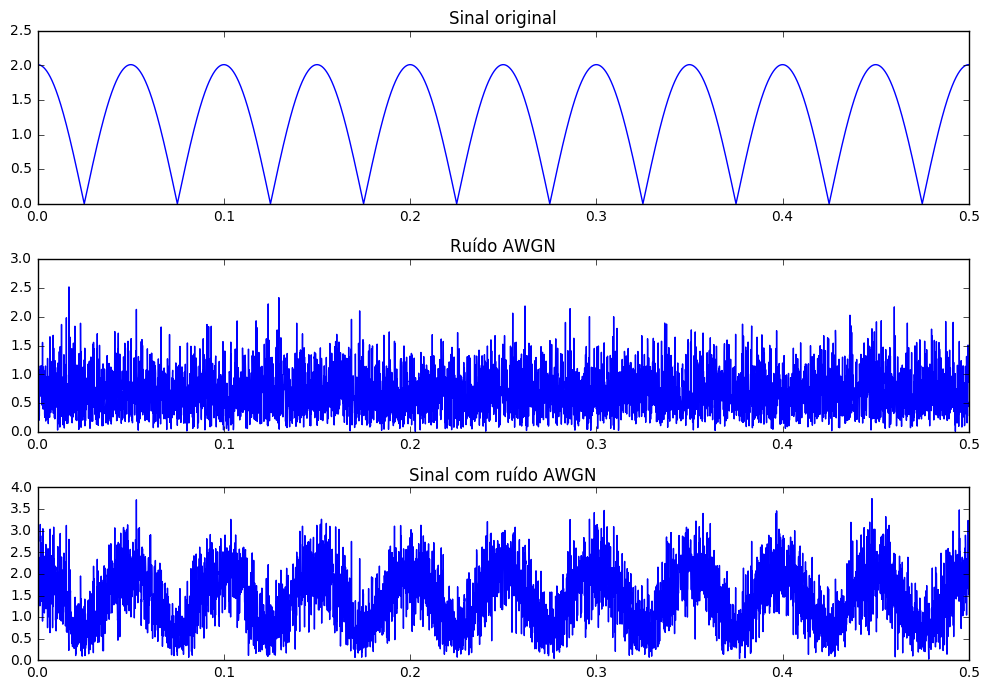

In [1]:
# Bibliotecas
import numpy as np
import matplotlib.pyplot as plt
#
## Parâmetros
SNR_dB = 5                                              # SNR de entrada em dB
t = np.arange(0,0.5,0.0001)                              # Eixo do tempo
Ar = 2                                                   # Amplitude da parte real
Ai = 0.2                                                 # Amplitude da parte imaginária
fx = 10                                                  # Frequência da onda
x=Ar*np.cos(2*np.pi*fx*t)  + 1j*Ai*np.cos(2*np.pi*fx*t)  # Sinal qualquer x(t)
#
## Gearação das amostras do ruído complexo
N = len(x)                                               # Tamanho de x
Ps = np.sum(np.abs(x)**2)/N                              # Calcula a potência do sinal
SNR = 10**(SNR_dB/10)                                    # Calcula a SNR linear
Pn = Ps/SNR                                              # Calcula a potência do ruído
sigmaNormalizado = np.sqrt(Pn/2)                         # Desvio padrão normalizado do ruído complexo
#
media=0.0
nr = np.random.normal(media,sigmaNormalizado,N)          # Amostras da parte real do ruído 
ni = np.random.normal(media,sigmaNormalizado,N)          # Amostras da parte imaginária do ruído 
n = nr + 1j*ni                                           # Ruído complexo
y = x + n                                                # Sinal complexo ruidoso
#
# Estimação da SNR pelas amostras do sinal recebido
pTx = (np.linalg.norm(x)**2)/N                 # Potência do sinal x(t)
pNe = (np.linalg.norm(n)**2)/N                 # Potência estimada do ruído
SNR1 = pTx/pNe;                                # Estimação da SNR linear
SNR1= 10*np.log10(SNR1)                        # SNR em dB
#
# Mostrar informações
print('Estimação de SNR: ')
print('   SNR de entrada: {} dB'.format(SNR_dB))
print('   SNR de entrada: {} dB'.format(SNR1))
# Gráficos: como se trata de sinal complexo, vamos mostrar sua magnitude
#
plt.figure(1,[10,7])
#
plt.subplot(311)
plt.title("Sinal original")
plt.plot(t,np.abs(x))
#
plt.subplot(312)
plt.title("Ruído AWGN")
plt.plot(t,np.abs(n))
#
plt.subplot(313)
plt.title("Sinal com ruído AWGN")
plt.plot(t,np.abs(y))
#
plt.tight_layout()
plt.show()

**Passo 04:** Abra um script no Matlab, salve-o como **handson8_2.m** e escreva o seguinte código (se for executar o código, não esqueça de mudar o Kernel do Jupyter para Matlab):

Estimação de SNR: 
   SNR de entrada: 5 dB
   SNR de entrada: 5.0129 dB


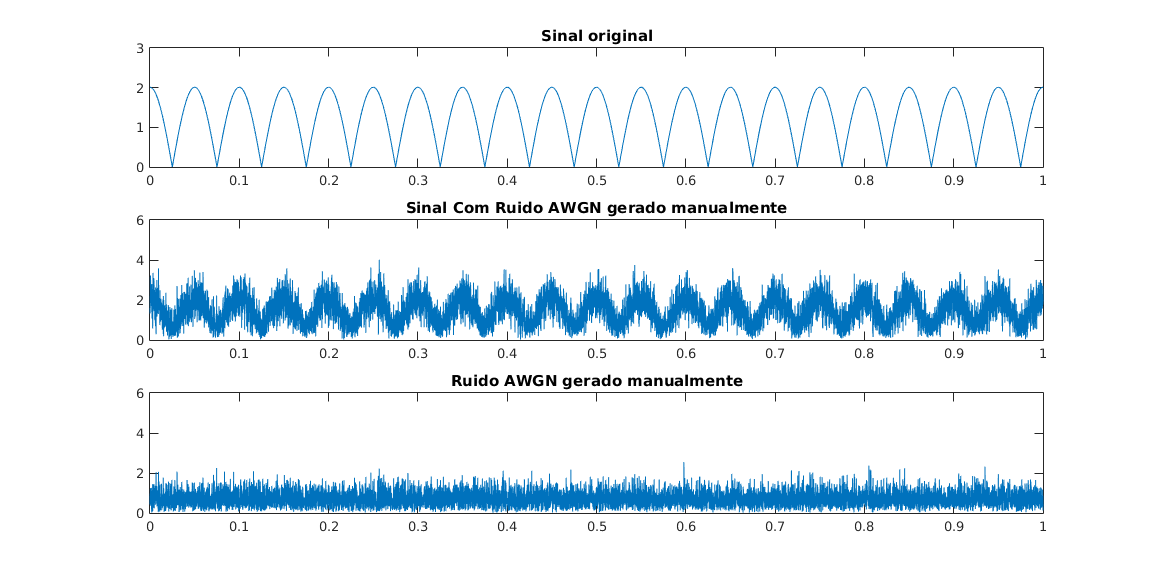

In [10]:
%% AWGN complexo
clc;clear all;close all;
% Parâmetros
SNR_dB = 5;                               % Determina o valor da SNR em dB
t = 0:0.0001:5;                            % Eixo do tempo
x=2*cos(2*pi*10*t)+i*0.2*cos(2*pi*10*t);   % Sinal qualquer x(t)
%
% Geração manual das amostras de ruído 
N = length(x);                               % Calcula o comprimento de x
Ps = sum(abs(x).^2)/N;                       % Calcula a potência do sinal
SNR = 10^(SNR_dB/10);                        % Calcula a SNR linear
Pn = Ps/SNR;                                 % Calcula a potência do ruído
noiseSigma = sqrt(Pn/2);                     % Desvio padrão do ruído normalizado 
n = noiseSigma*[randn(1,N)+j* randn(1,N)];   % Vetor do ruído 
y = x + n;                                   % Sinal ruidoso na recepção
%
% Estimação da SNR pelas amostras do sinal recebido
pTx = sum(abs(x.^2))/N;                      % Potência do sinal x(t)
pNe = sum(abs(n.^2))/N;                      % Potência estimada do ruído
SNR1 = pTx/pNe;                              % Estimação da SNR linear
SNR1= 10*log10(SNR1);                        % SNR em dB
%
% Mostrar informações
disp('Estimação de SNR: ')
disp(['   SNR de entrada: ' num2str(SNR_dB) ' dB']);
disp(['   SNR de entrada: ' num2str(SNR1) ' dB']);
%
% Gráficos
fig=figure;
subplot(3,1,1);
plot(t,abs(x));
title('Sinal original')
axis([0 1 0 3]);
%
subplot(3,1,2);
plot(t,abs(y));
title('Sinal Com Ruido AWGN gerado manualmente');
axis([0 1 0 6]);
%
subplot(3,1,3);
plot(t,abs(n));
title('Ruido AWGN gerado manualmente');
axis([0 1 0 6]);
fig.PaperUnits = 'inches';
fig.PaperPosition = [0 0 12 6];

**Para o relatório:** Gere amostras de ruído AWGN e faça e disserte sobre os seguintes gráficos:
- Autocovariância normalizada;
- Espectro.

Também reproduza no sistema de som do computador as amostras geradas. Você reconhece o som reproduzido?

Faça seu código em **Python** e em **Matlab**.


**Para o relatório:** Estimar a SNR (dB) de um sinal $x = A_{m}cos(2 \pi f_{m} t)$, salvo no arquivo [Pratica_08_sinal_real.mat](https://github.com/vicentesousa/DCO2004/blob/master/MATERIAL/HD_08/Pratica_08_sinal_real.mat) e de um sinal $x = A_{r}cos(2 \pi f_{m} t) + j\cdot A_{i}cos(2 \pi f_{m} t)$, salvo no arquivo  [Pratica_08_sinal_complexo.mat](https://github.com/vicentesousa/DCO2004/blob/master/MATERIAL/HD_08/Pratica_08_sinal_complexo.mat), respectivamente. Os arquivos disponibilizam o sinal recebido $y(t)$, sua frequência de amostragem $f_s$, a amplitude $A_{m}$ do sinal real, sua frequência $f_{m}$, as amplitudes $A_{r}$ e $A_{i}$ do sinal complexo.

Faça seu código em **Python** e em **Matlab**.

# Prática 02: Ruídos em comunicações digitais

Como mencionado, é mais apropriado usar $E_b/N_0$ para sistemas digitais. Para modelar tais sistemas, geralmente, normalizamos a energia do símbolo $E_s = 1$ e entramos com um valor de $E_b/N_0$ para calcularmos as amostras de ruído. Neste experimento, vamos exemplificar a geração de ruído AWGN em um sistema digital BPSK.

O modulador BPSK representa dígitos binários por meio de sinais distindos de tamanho $T_S$ segundos (tempo de símbolo). Assim, o sinal digital modulado é resultado de uma sequência de 0's e 1's transmitidos por meio de duas formas de onda de duração $T_S$, $s_{0}(t)$ e $s_{1}(t)$. Para sinais antipodais, cada bit será mapeado em um sinal correspondente conforme:

$$ 0 \mapsto s_{0}(t) \rightarrow E_b = -1$$

$$ 1 \mapsto s_{1}(t) \rightarrow E_b = 1$$

Representando o ruído como $n(t)$ e o sinal recebido como $r(t)$, temos:

$$r(t)= s_{i}(t)+n(t)$$

Para modulações M-árias (e.g. M-PSK), existem $M$ sinais diferentes, cada um representando $n$ bits, com $n = log_2(M)$. Por exemplo, para BPSK $M$ = 2, para 4-PSK M = 4 e para 16-QAM $M$ = 16. Assim, a energia do símbolo $E_s$ pode ser escrita, em função da energia do bit $E_b$, como:

$$E_s = M R_c E_b$$

sendo $R_c$ a taxa do codifcador de canal (sem codificação, $R_c$ = 1).

Assumindo $E_s$ = 1, e um ruído AWGN com média zero e variância $\sigma^2 = \frac{N_0}{2}$, a $E_b/N_0$ pode ser escrita como:

$$\frac{E_b}{N_0} = \frac{E_s}{M R_c N_0} =  \frac{1}{M 2 \sigma^2}$$

Assim, a variância do ruído pode ser calculada como:

$$\sigma^2 = \frac{1}{2M\frac{E_b}{N_0}}$$

Este experimento tem como objetivo mostrar a geração de ruído para um sistema digital, dado uma $E_b/N_0$ de entrada. Somente o sinal amostrado no detector do receptor será modelado e o diagrama de constelação será desenhado.



**Passo 01:** Abra um script no Python, salve-o como **handson8_3.py** e escreva o seguinte código (se for executar o código, não esqueça de mudar o Kernel do Jupyter para Python):

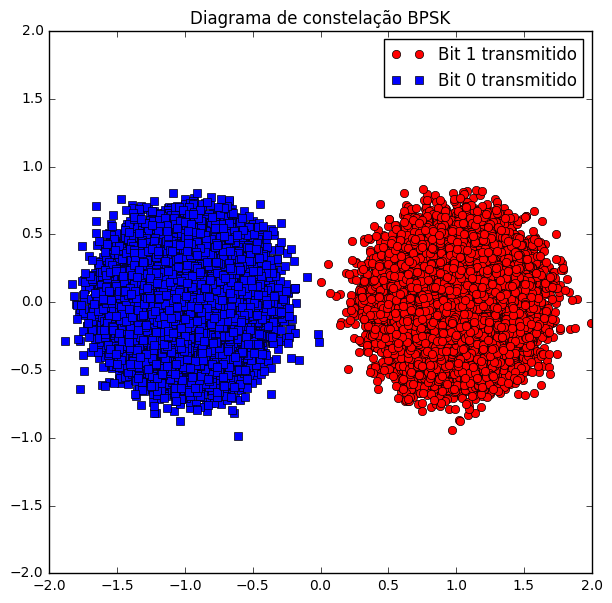

In [18]:
# Bibliotecas
import numpy as np
import matplotlib.pyplot as plt
#
## Parâmetros
EbN0_dB = 10                                           # Eb/N0 de entrada
Ns = 10**5                                             # Número de símbolos simulados
#
# Sinal BPSK gerado manualmente
bits = np.random.rand(1,Ns) > 0.5                      # Gera 0s e 1s com mesma probabilidade
simbolo = 2*bits-1                                     # Modulação BPSK: 0 -> -1; 1 -> 1 
sigmaRuido = 10**(-EbN0_dB/(2*10))                     # Desvio padrão do ruído AWGN 
sigmaNorm = sigmaRuido/np.sqrt(2)                      # Amostras do ruído AWGN
media = 0.0
nr = np.random.normal(media,sigmaNorm,Ns)              # Amostras da parte real do ruído 
ni = np.random.normal(media,sigmaNorm,Ns)              # Amostras da parte imaginária do ruído 
n = nr + 1j*ni                                         # Ruído complexo
y = simbolo + n                                        # Sinal ruidoso
#
# Gráficos
plt.figure(1,[7,7])
index1s = np.nonzero(y.real>0)
index0s = np.nonzero(y.real<=0)
plt.plot(y[index1s].real,y[index1s].imag,'ro')
plt.plot(y[index0s].real,y[index0s].imag,'bs')
plt.title("Diagrama de constelação BPSK")
plt.legend(["Bit 1 transmitido","Bit 0 transmitido"]);
#
plt.axis('equal')
plt.show()

**Passo 02:** Abra um script no Matlab, salve-o como **handson8_3.m** e escreva o seguinte código:

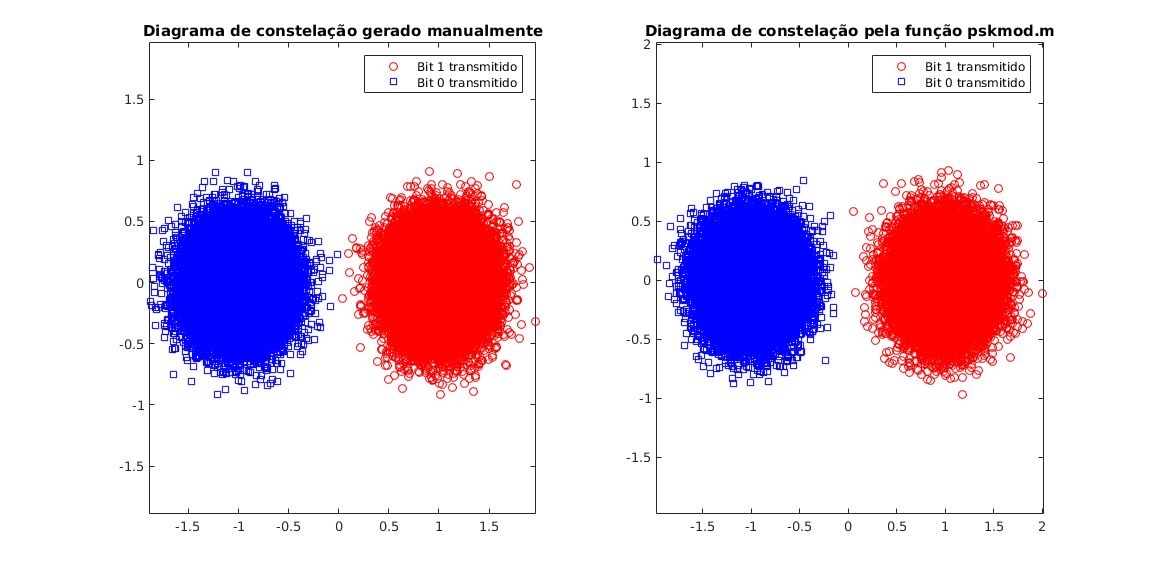

In [4]:
% Parâmetros
EbN0_dB = 10;                                          % Eb/N0 de entrada
Ns = 10^5;                                             % Número de símbolos simulados
% Sinal BPSK gerado manualmente
bits = rand(1,Ns) > 0.5;                               % Gera 0s e 1s com mesma probabilidade
simbolo = 2*bits-1;                                    % Modulação BPSK: 0 -> -1; 1 -> 1 
sigmaRuido = 10^(-EbN0_dB/(2*10));                     % Desvio padrão do ruído AWGN 
n = sigmaRuido/sqrt(2)*[randn(1,Ns) + j*randn(1,Ns)];  % Amostras do ruído AWGN
y = simbolo + n;                                       % Sinal ruidoso
% Gráficos
fig = figure;
subplot(1,2,1);
plot(y(find(real(y)>0)),'ro');
hold on;
plot(y(find(real(y)<=0)),'bs')
title('Diagrama de constelação gerado manualmente');
legend('Bit 1 transmitido','Bit 0 transmitido');
minAx = min([real(y) imag(y)]);
maxAx = max([real(y) imag(y)]);
axis([minAx maxAx minAx maxAx]);
% Sinal M-PSK gerado pela função pskmod
M = 2;                                                 % Número de símbolo da modulação
bits2 = randi([0 M-1],Ns,1);
txSig = pskmod(bits2,M);
rxSig = awgn(txSig,EbN0_dB);
% Gráficos
subplot(1,2,2);
plot(rxSig(find(real(rxSig)>0)),'ro');
hold on;
plot(rxSig(find(real(rxSig)<=0)),'bs')
title('Diagrama de constelação pela função pskmod.m');
legend('Bit 1 transmitido','Bit 0 transmitido');
minAx = min([real(rxSig)' imag(rxSig)']);
maxAx = max([real(rxSig)' imag(rxSig)']);
axis([minAx maxAx minAx maxAx]);
fig.PaperUnits = 'inches';
fig.PaperPosition = [0 0 12 6];
clear all;

### Comentários sobre o código

- Começamos o experimento definindo os parâmetros de entrada: a $E_b/N_0$ alvo e o número de símbolos a serem simulados:
>```python
% Parâmetros
EbN0_dB = 10;                                          % Eb/N0 de entrada
Ns = 10^5;                                             % Número de símbolos simulados
```

- O sinal BPSK é gerado manualmente por meio de sorteio de amostras distribuídas uniformemente entre 0 e 1. Essas amostras são particionadas em dois conjuntos com igual probabilidade (50%), um conjunto de bits 0's e outro de bits 1's. Observe que o vetor **bits** é uma sequência de 0's e 1's. 
>```python
% Sinal BPSK gerado manualmente
bits = rand(1,Ns) > 0.5;                               % Gera 0s e 1s com mesma probabilidade
```

- Como o objetivo desse experimento é modelar o sistema BPSK, o vetor de símbolos é pode ser obtido por um mapeamento simples de 0's em um nível de sinal igual a -1, e similarmente, mapera 1's em um nível de sinal igual a 1.
>```python
simbolo = 2*bits-1;                                    % Modulação BPSK: 0 -> -1; 1 -> 1 
```

- O ruído AWGN e o sinal ruidoso são gerados para uma $E_b/N_0$ de entrada (como discutido anteriormente):
>```python
sigmaRuido = 10^(-EbN0_dB/(2*10));                     % Desvio padrão do ruído AWGN 
n = sigmaRuido/sqrt(2)*[randn(1,Ns) + j*randn(1,Ns)];  % Amostras do ruído AWGN
y = simbolo + n;                                       % Sinal ruidoso
```

- Todo esse trabalho pode ser feito de maneira mais direta ao usar a função **mpskmod.m**, inclusive não somente para o BPSK. A função recebe o parâmetro $M$ como entrada, e podemos usá-la para gerar outros tipo de modulação PSK.
>```python
% Sinal M-PSK gerado pela função pskmod
M = 2;                                                 % Número de símbolo da modulação
bits2 = randi([0 M-1],Ns,1);
txSig = pskmod(bits2,M);
rxSig = awgn(txSig,EbN0_dB);
```

- O restante do código se destina a mostrar o diagrama de constelação (diagrama de fase) dos sinais gerados. Esse gráfico é uma ferramente visual importante para avaliar o efeito do ruído no desempenho de modulações digitais.


**Para o relatório**: use a função **pskmod.m** do Matlab e gere amostras para as seguintes combinações de moduladores e valores de $E_b/N_0$:
1. $E_b/N_0$ = 0, 5 e 20 dB; modulação BPSK;
2. $E_b/N_0$ = 0, 5 e 20 dB; modulação 8-PSK.

Disserte sobre os diagramas de constelação. O que pode ser dito sobre a diferenciação dos bits nas diversas configurações? O que pode ser dito ao comparar BPSK e 8-PSK com $E_b/N_0$ = 5 dB?

# Bilbiografia

[Wireless PI, Additive White Gaussian Noise (AWGN).](http://wirelesspi.com/additive-white-gaussian-noise-awgn/)

[Simulation and Analysis of White Noise in Matlab.](https://www.gaussianwaves.com/2013/11/simulation-and-analysis-of-white-noise-in-matlab/)

[Mathworks: pskmod documentation](https://www.mathworks.com/help/comm/ref/pskmod.html)

John G. Proakis, Masoud Salehi, John G. Proakis, Modern Communication Systems Using MATLAB, 3rd Edition, CENAGE Learning,2013.

HAYKIN, S.; MOHER, M. Sistemas de comunicação. 5. ed. Porto Alegre: Bookman, 2011. 512 p.

C. Richard Johnson Jr, William A. Sethares, Andrew G. Klein, Software Receiver Design 1st Edition, Cambridge University Press; 1 edition (August 18, 2011).

Lathi,B. P., Sistemas de Comunicações Analógicos e Digitais Modernos - 4ª Ed, LTC, 2012.


Varsha Mathuranathan, Digital Modulations using Matlab: Build Simulation Models (http://www.gaussianwaves.com).

Behrouz Forouzan, Data Communications and Networking (McGraw-Hill Forouzan Networking), 4th Edition, February 9, 2006.